# Computer Assignment 7 , part d) -- Group 2 

* Ali Bemani
* Oscar Bautista Gonzalez
* Martin Hellkvist

Same exercise as before but using Adam as optimizer.

$$  \min_{w}\ F_k(w) $$
where
$$ \forall k,\ w_{t+1}^k \leftarrow w_{t}\eta \frac{\widehat{m}_t}{\sqrt[]{\widehat{v}_t} + \epsilon} $$

In [1]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import resource
import time
from datetime import datetime
import math
import os
from sklearn import preprocessing
import sys
#import cvxpy
from multiprocessing import Process, Pipe
from multiprocessing.pool import ThreadPool

###------------------- keras imports for the dataset and neural network --------------------##
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras import backend as K

Using TensorFlow backend.


## Load data from keras

In [2]:
# Load data from keras:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_original = X_train
y_original = y_train

## Data visualization

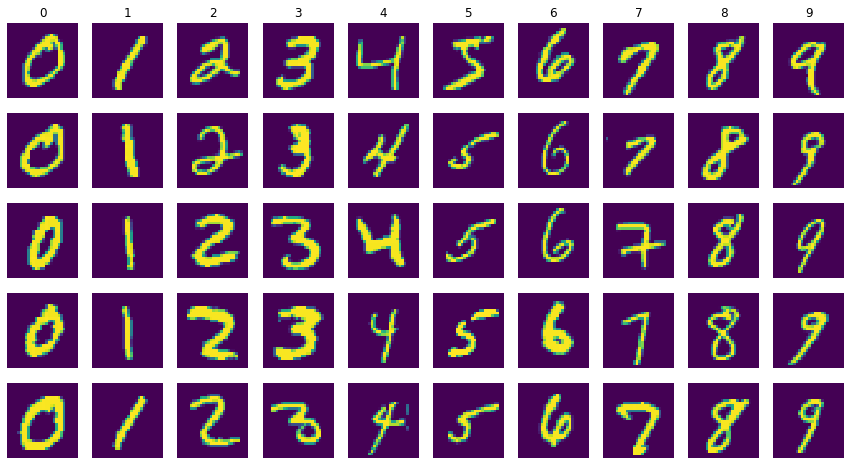

In [3]:
classes = np.arange(10)

fig, axs = plt.subplots(nrows=5,ncols=10,figsize=(15,8))
for i,x in enumerate(classes):
    t = y_original == x
    m = np.arange(60000)
    m = m[t]
    np.random.choice(m,5)
    for j in range(5):
        axs[j,i].imshow(X_original[m[j]],aspect = 'auto')
        if j == 0:
            axs[j,i].set_title(str(classes[i]))
        axs[j,i].axis('off')

In [4]:
## Preprocessing of data

In [5]:
## Preprocessing of data


# Reshape data for building the input vector from the 28x28 pixels

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10 #complete
Y_train = np_utils.to_categorical(y_train, n_classes) #(60000,10)
Y_test = np_utils.to_categorical(y_test, n_classes) #(10000,10)

In [6]:
#one hot enconding represent the classes in vectors
#0: [1,0,0,0,0,0,0,0,0,0]
#1:[0,1,0,0,0,0,0,0,0,0]
#...
#...
#...
#9:[0,0,...1]


In [7]:
#Shuffling the training data on 6 sets randomly
np.random.seed(1)
m = np.arange(60000)

np.random.shuffle(m)
X_wk = []
Y_wk = []
for i in range(6):
    s = m[(i*8165):((i+1)*8165)]
    X_s = X_train[s][:]
    Y_s = Y_train[s][:]
    X_wk.append(X_s)
    Y_wk.append(Y_s)

In [8]:
#Validation data
s = m[49000:]
X_t = X_train[s][:]
Y_t = Y_train[s][:]

## Multi-layer Neural Network (Distributed learning)

### $$f(x) = W_3 \times f(W_2 \times f(0, W_1 x))$$

In [14]:
## -------------------Deep Nural Network (DNN) -------------------------------------------
#----- Part (d) --------------------------------------------------------------------------


# Building a linear stack of layers with the sequential model

#Worker1
model1 = Sequential()
model1.add(Dense(100, input_shape=(784,)))
model1.add(Activation('relu'))                            

model1.add(Dense(100))
model1.add(Activation('relu'))

model1.add(Dense(100))
model1.add(Activation('relu'))

model1.add(Dense(10))
model1.add(Activation('softmax'))

#Worker2
model2 = Sequential()
model2.add(Dense(100, input_shape=(784,)))
model2.add(Activation('relu'))                            

model2.add(Dense(100))
model2.add(Activation('relu'))

model2.add(Dense(100))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))

#Worker3
model3 = Sequential()
model3.add(Dense(100, input_shape=(784,)))
model3.add(Activation('relu'))                            

model3.add(Dense(100))
model3.add(Activation('relu'))

model3.add(Dense(100))
model3.add(Activation('relu'))

model3.add(Dense(10))
model3.add(Activation('softmax'))

#Worker4
model4 = Sequential()
model4.add(Dense(100, input_shape=(784,)))
model4.add(Activation('relu'))                            

model4.add(Dense(100))
model4.add(Activation('relu'))

model4.add(Dense(100))
model4.add(Activation('relu'))

model4.add(Dense(10))
model4.add(Activation('softmax'))

#Worker5
model5 = Sequential()
model5.add(Dense(100, input_shape=(784,)))
model5.add(Activation('relu'))                            

model5.add(Dense(100))
model5.add(Activation('relu'))

model5.add(Dense(100))
model5.add(Activation('relu'))

model5.add(Dense(10))
model5.add(Activation('softmax'))

#Worker6
model6 = Sequential()
model6.add(Dense(100, input_shape=(784,)))
model6.add(Activation('relu'))                            

model6.add(Dense(100))
model6.add(Activation('relu'))

model6.add(Dense(100))
model6.add(Activation('relu'))

model6.add(Dense(10))
model6.add(Activation('softmax'))

In [15]:
##-------------------------- Compiling the sequential model ---------------------------------

optimizer = optimizers.Adam(lr= 0.001) # complete the command  
model1.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # complete the command  
model2.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # complete the command
model3.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # complete the command
model4.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # complete the command
model5.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # complete the command
model6.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # complete the command


##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

## Saving metrics in history

# Complete the history: 
# lists of metric values from the training process
worker1_loss = [];worker2_loss = [];worker3_loss = [];worker4_loss = [];worker5_loss = [];worker6_loss = []
worker1_vloss = [];worker2_vloss = [];worker3_vloss = [];worker4_vloss = [];worker5_vloss = [];worker6_vloss = []
worker1_acc = [];worker2_acc = [];worker3_acc = [];worker4_acc = [];worker5_acc = [];worker6_acc = []
worker1_vacc = [];worker2_vacc = [];worker3_vacc = [];worker4_vacc = [];worker5_vacc = [];worker6_vacc = []

nn = 30 #communication rounds
for i in range(nn):
    #training on each worker
    history1 = model1.fit(X_wk[0], Y_wk[0], batch_size =None, epochs= 1, verbose= 2, validation_data=(X_t,Y_t))
    history2 = model2.fit(X_wk[1], Y_wk[1], batch_size =None, epochs= 1, verbose= 2, validation_data=(X_t,Y_t))
    history3 = model3.fit(X_wk[2], Y_wk[2], batch_size =None, epochs= 1, verbose= 2, validation_data=(X_t,Y_t))
    history4 = model4.fit(X_wk[3], Y_wk[3], batch_size =None, epochs= 1, verbose= 2, validation_data=(X_t,Y_t))
    history5 = model5.fit(X_wk[4], Y_wk[4], batch_size =None, epochs= 1, verbose= 2, validation_data=(X_t,Y_t))
    history6 = model6.fit(X_wk[5], Y_wk[5], batch_size =None, epochs= 1, verbose= 2, validation_data=(X_t,Y_t))
    
    #saving metrics
    worker1_loss.append(history1.history['loss'])
    worker2_loss.append(history2.history['loss'])
    worker3_loss.append(history3.history['loss'])
    worker4_loss.append(history4.history['loss'])
    worker5_loss.append(history5.history['loss'])
    worker6_loss.append(history6.history['loss'])

    worker1_vloss.append(history1.history['val_loss'])
    worker2_vloss.append(history2.history['val_loss'])
    worker3_vloss.append(history3.history['val_loss'])
    worker4_vloss.append(history4.history['val_loss'])
    worker5_vloss.append(history5.history['val_loss'])
    worker6_vloss.append(history6.history['val_loss'])

    worker1_acc.append(history1.history['accuracy'])
    worker2_acc.append(history2.history['accuracy'])
    worker3_acc.append(history3.history['accuracy'])
    worker4_acc.append(history4.history['accuracy'])
    worker5_acc.append(history5.history['accuracy'])
    worker6_acc.append(history6.history['accuracy'])

    worker1_vacc.append(history1.history['val_accuracy'])
    worker2_vacc.append(history2.history['val_accuracy'])
    worker3_vacc.append(history3.history['val_accuracy'])
    worker4_vacc.append(history4.history['val_accuracy'])
    worker5_vacc.append(history5.history['val_accuracy'])
    worker6_vacc.append(history6.history['val_accuracy'])

    #getting parameters of the DNN from each worker
    a = model1.get_weights()
    b = model2.get_weights()
    c = model3.get_weights()
    d = model4.get_weights()
    e = model5.get_weights()
    f = model5.get_weights()
    
    for i in range(8): #averaging weights and biases
        a[i] = (a[i] + b[i] + c[i] + d[i] + e[i] + f[i])/6
    
    #setting parameters on the DNN after averaging
    model1.set_weights(a)
    model2.set_weights(a)
    model3.set_weights(a)
    model4.set_weights(a)
    model5.set_weights(a)
    model6.set_weights(a)
    
    #metrics from the training
    optimizer = optimizers.Adam(lr= 0.001) # complete the command  
    model1.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) #   
    model2.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # 
    model3.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # 
    model4.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # 
    model5.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # 
    model6.compile(loss='categorical_crossentropy', metrics=['mse','accuracy'], optimizer= optimizer) # 

end = time.time()

#saving the model
save_dir = "D:\PhD\Python\MLON\CA7" # Complete
model_name = 'CA7d_Adam' # Complete
model_path = os.path.join(save_dir, model_name)
model1.save(model_path)

Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.6023 - mse: 0.0266 - accuracy: 0.8142 - val_loss: 0.3646 - val_mse: 0.0173 - val_accuracy: 0.8808
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.4743 - mse: 0.0213 - accuracy: 0.8507 - val_loss: 0.2618 - val_mse: 0.0121 - val_accuracy: 0.9195
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.4782 - mse: 0.0211 - accuracy: 0.8558 - val_loss: 0.2456 - val_mse: 0.0112 - val_accuracy: 0.9245
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.4422 - mse: 0.0200 - accuracy: 0.8584 - val_loss: 0.2406 - val_mse: 0.0110 - val_accuracy: 0.9261
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.4462 - mse: 0.0204 - accuracy: 0.8556 - val_loss: 0.2502 - val_mse: 0.0110 - val_accuracy: 0.9264
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.4254 - mse: 0.0192 - accuracy: 0.8670 - val_loss: 0.2612 - v

Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1013 - mse: 0.0044 - accuracy: 0.9721 - val_loss: 0.1206 - val_mse: 0.0053 - val_accuracy: 0.9652
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1242 - mse: 0.0057 - accuracy: 0.9634 - val_loss: 0.1445 - val_mse: 0.0061 - val_accuracy: 0.9607
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1359 - mse: 0.0061 - accuracy: 0.9600 - val_loss: 0.1326 - val_mse: 0.0059 - val_accuracy: 0.9620
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1298 - mse: 0.0056 - accuracy: 0.9652 - val_loss: 0.1428 - val_mse: 0.0063 - val_accuracy: 0.9579
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1180 - mse: 0.0051 - accuracy: 0.9672 - val_loss: 0.1424 - val_mse: 0.0060 - val_accuracy: 0.9617
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1778 - mse: 0.0076 - accuracy: 0.9513 - val_loss: 0.1353 - v

Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0708 - mse: 0.0029 - accuracy: 0.9821 - val_loss: 0.1087 - val_mse: 0.0044 - val_accuracy: 0.9708
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0951 - mse: 0.0036 - accuracy: 0.9783 - val_loss: 0.1377 - val_mse: 0.0053 - val_accuracy: 0.9673
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1029 - mse: 0.0042 - accuracy: 0.9728 - val_loss: 0.1248 - val_mse: 0.0049 - val_accuracy: 0.9691
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1096 - mse: 0.0043 - accuracy: 0.9733 - val_loss: 0.1544 - val_mse: 0.0057 - val_accuracy: 0.9638
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0856 - mse: 0.0034 - accuracy: 0.9767 - val_loss: 0.1836 - val_mse: 0.0062 - val_accuracy: 0.9612
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1517 - mse: 0.0061 - accuracy: 0.9623 - val_loss: 0.1417 - v

Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0654 - mse: 0.0025 - accuracy: 0.9840 - val_loss: 0.1314 - val_mse: 0.0042 - val_accuracy: 0.9738
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0791 - mse: 0.0030 - accuracy: 0.9803 - val_loss: 0.1367 - val_mse: 0.0045 - val_accuracy: 0.9720
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1005 - mse: 0.0037 - accuracy: 0.9775 - val_loss: 0.1591 - val_mse: 0.0046 - val_accuracy: 0.9721
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0986 - mse: 0.0035 - accuracy: 0.9783 - val_loss: 0.1564 - val_mse: 0.0051 - val_accuracy: 0.9678
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.0761 - mse: 0.0027 - accuracy: 0.9837 - val_loss: 0.2088 - val_mse: 0.0059 - val_accuracy: 0.9641
Train on 8165 samples, validate on 11000 samples
Epoch 1/1
 - 1s - loss: 0.1683 - mse: 0.0063 - accuracy: 0.9609 - val_loss: 0.1228 - v

In [34]:
training_vacc =worker1_vacc[-1] + worker2_vacc[-1] + worker3_vacc[-1] + worker4_vacc[-1] + worker5_vacc[-1] + worker6_vacc[-1]
sum(training_vacc)/6

0.9696060617764791

Test Loss 0.1344934373032884
Test Accuracy 0.97563636302948
Time 567.0507457256317


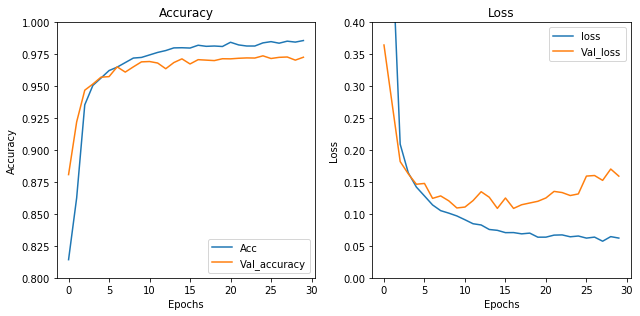

In [30]:
# plotting the metrics


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4.5), tight_layout=True,sharey=False) 
ax1.plot(worker1_acc,color="C0",label="Acc")
ax1.plot(worker1_vacc, color = "C1",label='Val_accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.set_ylim([0.8,1])
ax1.legend()

# plotting the metrics
ax2.plot(worker1_loss, color = "C0",label='loss')
ax2.plot(worker1_vloss, color = "C1",label='Val_loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.set_ylim([0,0.4])
ax2.legend()
#Plot here
#--------------------------------------------------------------------

## Evaluate the model

mnist_model = load_model(model_path)
loss_and_metrics = model1.evaluate(X_t,Y_t, batch_size=None,verbose=0)  

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[2])
print("Time", end-start)



0  classified correctly
1  classified incorrectly


C:\Users\osrbaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\osrbaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


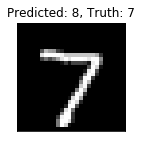

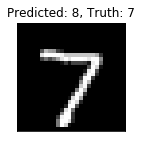

In [18]:
# ------------------------- Load the model and create predictions on the test set --------------------
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_t)

## --------- See which we predicted correctly and which not-----------
correct_indices = np.nonzero(predicted_classes == Y_t)[0] # Complete 
incorrect_indices = np.nonzero(predicted_classes != Y_t)[0] # Complete 
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (14,14)
figure_evaluation = plt.figure()


####----------------------------------------- Plot the results----------------

# plot 9 correct predictions
for i,correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title(
        "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                          y_test[correct]))
    plt.xticks([])
    plt.yticks([])


# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray',
interpolation='none')
    plt.title(
    "Predicted: {}, Truth: {}".format(predicted_classes[incorrect],
                                      y_test[incorrect]))
    
    plt.xticks([])
    plt.yticks([])
    
figure_evaluation